## GROUP N°

## NAMES 

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
# import other libraries when needed 

## 1. DATA PROCESSING

In [39]:
# Load raw data
df = pd.read_parquet("dataDumper.parquet")


In [40]:
df.head(10)

,Time_utc,VehicleName,VehicleType,Pressure_Pa_1,Pressure_Pa_2,Pressure_Pa_3,Pressure_Pa_4,Pressure_Pa_5,Pressure_Pa_6,Temperature_K_1,...,Altitude_m,Speed_mps,epsilonX,epsilonY,epsilonZ,epsilonSpeed,AtmosphericPressure_Pa,dt_s,dd_m,RatioPayload
0,2023-01-01 00:00:00.328,C-132,Dumper,993010.933333,1.003995e+06,856000.000000,798005.466667,819994.533333,864994.533333,346.15,...,4581.000000,9.003,6.207,6.312,23.000000,0.0,59002.557667,4.912,41.480140,0.0
1,2023-01-01 00:00:05.338,C-132,Dumper,993177.933329,1.003911e+06,856000.000000,798088.966665,819911.033335,864911.033335,346.15,...,4577.600098,9.003,6.393,6.797,27.600000,0.0,59028.296172,5.010,45.952211,0.0
2,2023-01-01 00:00:10.331,C-132,Dumper,993344.366669,1.003828e+06,856000.000000,798172.183334,819827.816666,864827.816666,346.15,...,4573.000000,9.723,6.721,7.631,32.200001,0.0,59064.789917,4.993,47.007842,0.0
3,2023-01-01 00:00:15.325,C-132,Dumper,993510.833331,1.003745e+06,856000.000000,798255.416666,819744.583334,864744.583334,346.15,...,4568.600098,9.620,6.361,6.504,23.000000,0.0,59101.596928,4.994,48.700870,0.0
4,2023-01-01 00:00:20.448,C-132,Dumper,993681.600000,1.003659e+06,856000.000000,798340.800000,819659.200000,864659.200000,346.15,...,4564.500000,11.318,6.361,7.144,23.000000,0.0,59139.354701,5.123,52.675397,0.0
5,2023-01-01 00:00:25.426,C-132,Dumper,993847.533329,1.003576e+06,856000.000000,798423.766665,819576.233335,864576.233335,346.15,...,4562.799805,9.517,6.418,7.085,27.600000,0.0,59143.106491,4.978,53.844586,0.0
6,2023-01-01 00:00:30.324,C-132,Dumper,994010.800000,1.003495e+06,856000.000000,798505.400000,819494.600000,864494.600000,346.15,...,4562.200195,7.871,7.548,6.375,27.600000,0.0,59163.337075,4.898,37.223403,0.0
7,2023-01-01 00:00:35.348,C-132,Dumper,994178.266667,1.003411e+06,856000.000000,798589.133333,819410.866667,864410.866667,346.15,...,4557.299805,11.935,6.206,6.108,23.000000,0.0,59184.088085,5.024,49.864229,0.0
8,2023-01-01 00:01:00.446,C-132,Dumper,994985.133329,1.003000e+06,855992.566665,799000.000000,818985.133329,863992.566665,346.15,...,4544.299805,15.485,7.339,9.734,32.200001,0.0,59287.943070,25.098,NaN,0.0
9,2023-01-01 00:01:05.330,C-132,Dumper,994822.333338,1.003000e+06,855911.166669,799000.000000,818822.333338,863911.166669,346.15,...,4543.399902,14.302,7.013,8.653,27.600000,0.0,59292.772063,4.884,73.735036,0.0


In [41]:
df.columns

Index(['Time_utc', 'VehicleName', 'VehicleType', 'Pressure_Pa_1',
       'Pressure_Pa_2', 'Pressure_Pa_3', 'Pressure_Pa_4', 'Pressure_Pa_5',
       'Pressure_Pa_6', 'Temperature_K_1', 'Temperature_K_2',
       'Temperature_K_3', 'Temperature_K_4', 'Temperature_K_5',
       'Temperature_K_6', 'ColdPressure_Pa_1', 'ColdPressure_Pa_2',
       'ColdPressure_Pa_3', 'ColdPressure_Pa_4', 'ColdPressure_Pa_5',
       'ColdPressure_Pa_6', 'Latitude_dd', 'Longitude_dd', 'Altitude_m',
       'Speed_mps', 'epsilonX', 'epsilonY', 'epsilonZ', 'epsilonSpeed',
       'AtmosphericPressure_Pa', 'dt_s', 'dd_m', 'RatioPayload'],
      dtype='object')

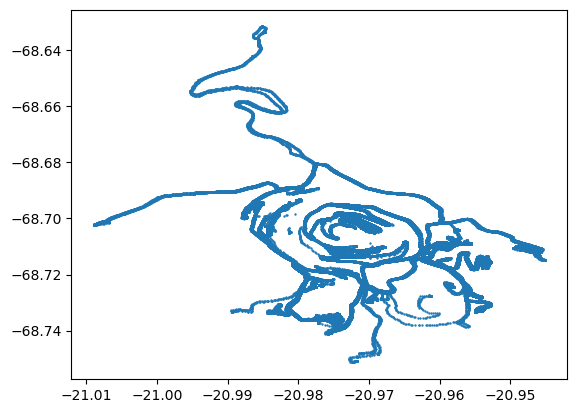

In [42]:
plt.scatter(x = df['Latitude_dd'], y = df['Longitude_dd'], s=0.5)

In [43]:
plot = df[['Longitude_dd','Latitude_dd']]

## Trajectory Construction

In [44]:
# Create Segments based on  RatioPayLoad
df[['phaseNb']] = df[['RatioPayload']].diff().abs().cumsum()

In [45]:
# Variable de dénivelé pour chaque point
df['dAlt_m'] = df['Altitude_m'].diff().fillna(0)  # diff entre points consécutifs


In [46]:
df.head(5)

,Time_utc,VehicleName,VehicleType,Pressure_Pa_1,Pressure_Pa_2,Pressure_Pa_3,Pressure_Pa_4,Pressure_Pa_5,Pressure_Pa_6,Temperature_K_1,...,epsilonX,epsilonY,epsilonZ,epsilonSpeed,AtmosphericPressure_Pa,dt_s,dd_m,RatioPayload,phaseNb,dAlt_m
0,2023-01-01 00:00:00.328,C-132,Dumper,993010.933333,1.003995e+06,856000.0,798005.466667,819994.533333,864994.533333,346.15,...,6.207,6.312,23.000000,0.0,59002.557667,4.912,41.480140,0.0,NaN,0.000000
1,2023-01-01 00:00:05.338,C-132,Dumper,993177.933329,1.003911e+06,856000.0,798088.966665,819911.033335,864911.033335,346.15,...,6.393,6.797,27.600000,0.0,59028.296172,5.010,45.952211,0.0,0.0,-3.399902
2,2023-01-01 00:00:10.331,C-132,Dumper,993344.366669,1.003828e+06,856000.0,798172.183334,819827.816666,864827.816666,346.15,...,6.721,7.631,32.200001,0.0,59064.789917,4.993,47.007842,0.0,0.0,-4.600098
3,2023-01-01 00:00:15.325,C-132,Dumper,993510.833331,1.003745e+06,856000.0,798255.416666,819744.583334,864744.583334,346.15,...,6.361,6.504,23.000000,0.0,59101.596928,4.994,48.700870,0.0,0.0,-4.399902
4,2023-01-01 00:00:20.448,C-132,Dumper,993681.600000,1.003659e+06,856000.0,798340.800000,819659.200000,864659.200000,346.15,...,6.361,7.144,23.000000,0.0,59139.354701,5.123,52.675397,0.0,0.0,-4.100098


In [47]:
#Split the data into loaded trajectories and empty trajectories
segment_list = [data_phase for _, data_phase in df.groupby('phaseNb')]
empty_segment_list = []
load_segment_list = []

for segment in segment_list:
    if segment.RatioPayload.mean() == 0.0:
        empty_segment_list.append(segment)
    elif segment.RatioPayload.mean() == 1.0:
        load_segment_list.append(segment)

In [48]:
print(f'N° of Loaded segments :{len(load_segment_list)}')
print(f'N° of Empty segments :{len(empty_segment_list)}')

N° of Loaded segments :263
N° of Empty segments :263


<Axes: xlabel='Latitude_dd', ylabel='Longitude_dd'>

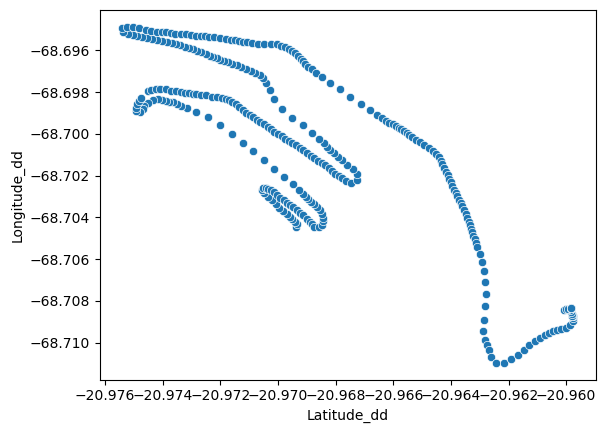

In [49]:
sns.scatterplot(x = load_segment_list[0]['Latitude_dd'],
                y = load_segment_list[0]['Longitude_dd'])

## 2. DATA ANALYSIS

Perform a comprehensive analysis of the dataset to uncover underlying patterns or characteristics. Visualize data distributions and relationships, such as speed vs. time, acceleration profiles, or geographical movements ... BE CURIOUS 

<Axes: xlabel='Latitude_dd', ylabel='Longitude_dd'>

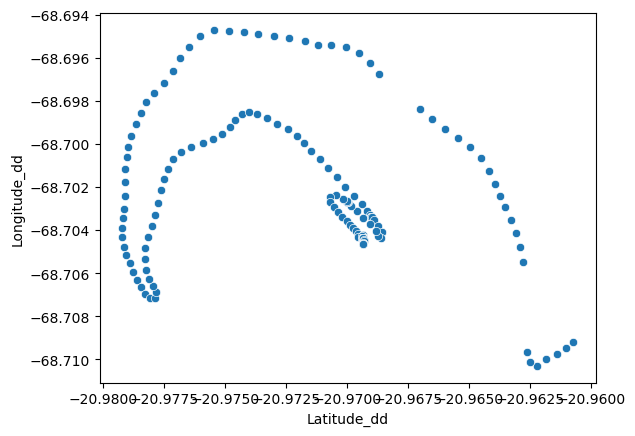

In [50]:

sns.scatterplot(x = empty_segment_list[0]['Latitude_dd'],
                y = empty_segment_list[0]['Longitude_dd']) # pas le même chemin suivant charger/pas charger (descendre dans la mine / remontée)


In [51]:
maxPression_vide = np.max([segment['Pressure_Pa_1'].max() for segment in empty_segment_list])
print("pression maximum a vide ",maxPression_vide)
minPression_vide = np.min([segment['Pressure_Pa_1'].max() for segment in empty_segment_list])
print("Pression minimum a vide ", minPression_vide)

maxPression_plein = np.max([segment['Pressure_Pa_1'].max() for segment in load_segment_list])
print("pression maximum a vide ",maxPression_plein)

minPression_plein = np.min([segment['Pressure_Pa_1'].max() for segment in load_segment_list])
print("Pression minimum a vide ", minPression_plein)

# Pression à pas l'aire de variée tant que cela entre plein et vide à travers les segments

pression maximum a vide  1029000.0
Pression minimum a vide  892993.6500010666
pression maximum a vide  1037933.3333333334
Pression minimum a vide  873000.0


In [52]:
df.columns

Index(['Time_utc', 'VehicleName', 'VehicleType', 'Pressure_Pa_1',
       'Pressure_Pa_2', 'Pressure_Pa_3', 'Pressure_Pa_4', 'Pressure_Pa_5',
       'Pressure_Pa_6', 'Temperature_K_1', 'Temperature_K_2',
       'Temperature_K_3', 'Temperature_K_4', 'Temperature_K_5',
       'Temperature_K_6', 'ColdPressure_Pa_1', 'ColdPressure_Pa_2',
       'ColdPressure_Pa_3', 'ColdPressure_Pa_4', 'ColdPressure_Pa_5',
       'ColdPressure_Pa_6', 'Latitude_dd', 'Longitude_dd', 'Altitude_m',
       'Speed_mps', 'epsilonX', 'epsilonY', 'epsilonZ', 'epsilonSpeed',
       'AtmosphericPressure_Pa', 'dt_s', 'dd_m', 'RatioPayload', 'phaseNb',
       'dAlt_m'],
      dtype='object')

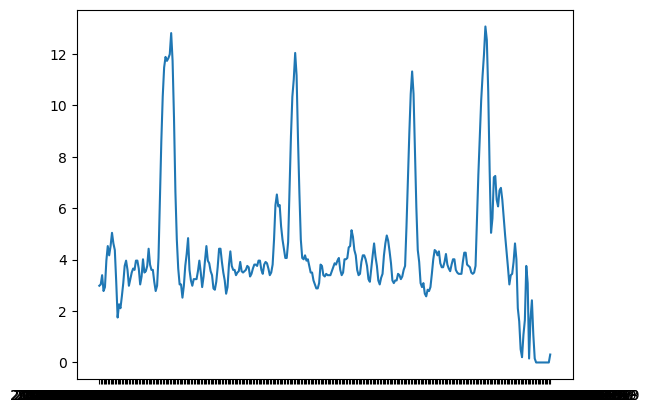

In [53]:
plt.plot(load_segment_list[0]['Time_utc'],load_segment_list[0]['Speed_mps'])
maxVitesse = load_segment_list[0]['Speed_mps'].max()
indiceMaxSpeed = load_segment_list[0]['Speed_mps'].idxmax()


In [54]:
max = [0,0,0,0,0,0]
min = [1e10,1e10,1e10,1e10,1e10,1e10]
features = ['Pressure_Pa_1','Pressure_Pa_2','Pressure_Pa_3','Pressure_Pa_4','Pressure_Pa_5','Pressure_Pa_6']
for i in range(len(load_segment_list)):
    for j in range(len(features)):
        if load_segment_list[i][features[j]].max() > max[j]:
            max[j] = load_segment_list[i][features[j]].max()
        if load_segment_list[i][features[j]].min() < min[j]:
            min[j] = load_segment_list[i][features[j]].min()

print(max)
print(min)

[1037933.3333333334, 1012603.1666773332, 882986.6333354666, 845916.6666666666, 842978.9500032, 889000.0]
[855006.0, 838042.6000042667, 736910.9000021333, 681019.1333376, 709777.2500053333, 656462.4999765333]


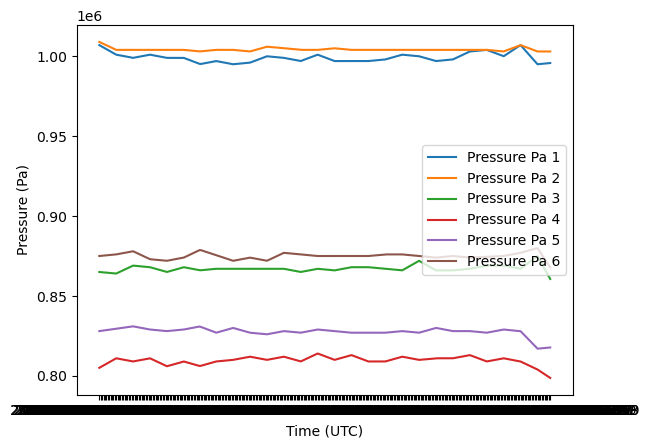

In [55]:
plt.plot(load_segment_list[0]['Time_utc'], load_segment_list[0]['Pressure_Pa_1'], label='Pressure Pa 1')
plt.plot(load_segment_list[0]['Time_utc'], load_segment_list[0]['Pressure_Pa_2'], label='Pressure Pa 2')
plt.plot(load_segment_list[0]['Time_utc'], load_segment_list[0]['Pressure_Pa_3'], label='Pressure Pa 3')
plt.plot(load_segment_list[0]['Time_utc'], load_segment_list[0]['Pressure_Pa_4'], label='Pressure Pa 4')
plt.plot(load_segment_list[0]['Time_utc'], load_segment_list[0]['Pressure_Pa_5'], label='Pressure Pa 5')
plt.plot(load_segment_list[0]['Time_utc'], load_segment_list[0]['Pressure_Pa_6'], label='Pressure Pa 6')

plt.xlabel("Time (UTC)")
plt.ylabel("Pressure (Pa)")
plt.legend()
plt.show()


## 3. Distance Metrics for Trajectories 
Learn and apply suitable distance measures for trajectories. These may include Euclidean distance, Dynamic Time Warping (DTW), or Fréchet distance. Experiment with different metrics to find the most suitable one for clustering vehicle trajectories.
Trajectory Construction ( Based on the preprocessed data, construct trajectories that reflect the vehicle's movement over time. Define how you will represent a trajectory (e.g., as a series of time-stamped GPS coordinates or motion states).

### Analyse exploratoire des données

In [56]:
df.info()
df.isna().sum()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201312 entries, 0 to 201311
Data columns (total 35 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Time_utc                201312 non-null  object 
 1   VehicleName             201312 non-null  object 
 2   VehicleType             201312 non-null  object 
 3   Pressure_Pa_1           198245 non-null  float64
 4   Pressure_Pa_2           201106 non-null  float64
 5   Pressure_Pa_3           201190 non-null  float64
 6   Pressure_Pa_4           201088 non-null  float64
 7   Pressure_Pa_5           201178 non-null  float64
 8   Pressure_Pa_6           201158 non-null  float64
 9   Temperature_K_1         198245 non-null  float64
 10  Temperature_K_2         201106 non-null  float64
 11  Temperature_K_3         201190 non-null  float64
 12  Temperature_K_4         201088 non-null  float64
 13  Temperature_K_5         201178 non-null  float64
 14  Temperature_K_6     

np.int64(0)

In [57]:
#df.groupby("phaseNb").describe()


## Supression des valeurs manquantes

In [58]:
print(df.isnull().sum())

# Supprimer les lignes contenant au moins une valeur nulle
df = df.dropna()


Time_utc                     0
VehicleName                  0
VehicleType                  0
Pressure_Pa_1             3067
Pressure_Pa_2              206
Pressure_Pa_3              122
Pressure_Pa_4              224
Pressure_Pa_5              134
Pressure_Pa_6              154
Temperature_K_1           3067
Temperature_K_2            206
Temperature_K_3            122
Temperature_K_4            224
Temperature_K_5            134
Temperature_K_6            154
ColdPressure_Pa_1         3067
ColdPressure_Pa_2          206
ColdPressure_Pa_3          122
ColdPressure_Pa_4          224
ColdPressure_Pa_5          134
ColdPressure_Pa_6          154
Latitude_dd                  0
Longitude_dd                 0
Altitude_m                   0
Speed_mps                    0
epsilonX                     0
epsilonY                     0
epsilonZ                     0
epsilonSpeed                 0
AtmosphericPressure_Pa     957
dt_s                         0
dd_m                      2634
RatioPay

In [59]:
print("Valeurs nulles restantes :", df.isnull().sum().sum())


Valeurs nulles restantes : 0


## Analyse des partie du véhicule

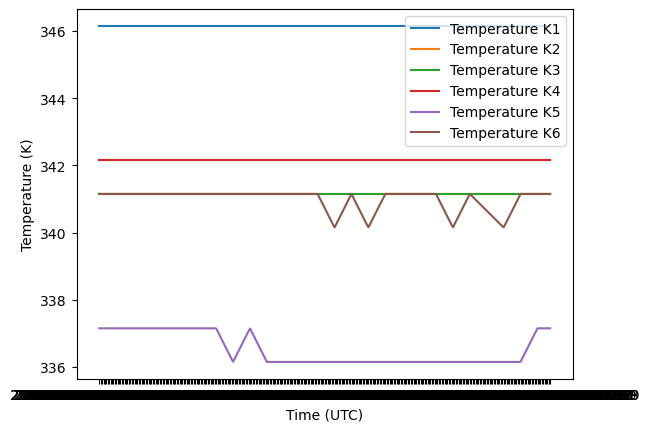

In [60]:
plt.plot(load_segment_list[0]['Time_utc'], load_segment_list[0]['Temperature_K_1'], label='Temperature K1')
plt.plot(load_segment_list[0]['Time_utc'], load_segment_list[0]['Temperature_K_2'], label='Temperature K2')
plt.plot(load_segment_list[0]['Time_utc'], load_segment_list[0]['Temperature_K_3'], label='Temperature K3')
plt.plot(load_segment_list[0]['Time_utc'], load_segment_list[0]['Temperature_K_4'], label='Temperature K4')
plt.plot(load_segment_list[0]['Time_utc'], load_segment_list[0]['Temperature_K_5'], label='Temperature K5')
plt.plot(load_segment_list[0]['Time_utc'], load_segment_list[0]['Temperature_K_6'], label='Temperature K6')

plt.xlabel("Time (UTC)")
plt.ylabel("Temperature (K)")
plt.legend()
plt.show()


Le pneu n°1 semble chauffer plus que les autres.
Explicaitons?

## Vérification de la charge mise sur le véhicule

In [61]:
# moyenne de la pression des pneus à vide (servira de référence)
mean_empty_pressure1 = np.mean([segment['Pressure_Pa_1'].mean() for segment in empty_segment_list])
mean_empty_pressure2 = np.mean([segment['Pressure_Pa_2'].mean() for segment in empty_segment_list])
mean_empty_pressure3 = np.mean([segment['Pressure_Pa_3'].mean() for segment in empty_segment_list])
mean_empty_pressure4 = np.mean([segment['Pressure_Pa_4'].mean() for segment in empty_segment_list])
mean_empty_pressure5 = np.mean([segment['Pressure_Pa_5'].mean() for segment in empty_segment_list])
mean_empty_pressure6 = np.mean([segment['Pressure_Pa_6'].mean() for segment in empty_segment_list])
print(mean_empty_pressure1,mean_empty_pressure2,mean_empty_pressure3,mean_empty_pressure4,mean_empty_pressure5,mean_empty_pressure6) 


981220.3633298597 961794.3844067334 829439.0742748395 769457.2295631408 799682.6282185455 829345.2290415111


La différence de pression entre les pneus est explicable par plusieurs facteurs :

### 1. Différence de masse
- moteur massif d’un côté
- transmission, différentiel, réservoir
- cabine décentrée
- benne et vérins hydrauliques

### 2. Différence de température
- pneus proches du moteur → plus chauds
- exposition solaire différente
- freinage résiduel

### 3. Autres facteurs
- usure des pneus
- pneus arrière supportant une masse plus importante → pression adaptée


In [62]:
mean_load_pressure1 = np.mean([segment['Pressure_Pa_1'].mean() for segment in load_segment_list])
mean_load_pressure2 = np.mean([segment['Pressure_Pa_2'].mean() for segment in load_segment_list])
mean_load_pressure3 = np.mean([segment['Pressure_Pa_3'].mean() for segment in load_segment_list])
mean_load_pressure4 = np.mean([segment['Pressure_Pa_4'].mean() for segment in load_segment_list])
mean_load_pressure5 = np.mean([segment['Pressure_Pa_5'].mean() for segment in load_segment_list])
mean_load_pressure6 = np.mean([segment['Pressure_Pa_6'].mean() for segment in load_segment_list])
print(mean_load_pressure1,mean_load_pressure2,mean_load_pressure3,mean_load_pressure4,mean_load_pressure5,mean_load_pressure6) 

985667.6111007292 964206.6684032545 838525.0005380911 778627.1808613387 808251.1378584408 840235.6954551956


### Calcul de la masse en moyenne mis dans le camion

In [63]:
mean_load_temperature1 = np.mean([segment['Temperature_K_1'].mean() for segment in load_segment_list])
mean_load_temperature2 = np.mean([segment['Temperature_K_2'].mean() for segment in load_segment_list])
mean_load_temperature3 = np.mean([segment['Temperature_K_3'].mean() for segment in load_segment_list])
mean_load_temperature4 = np.mean([segment['Temperature_K_4'].mean() for segment in load_segment_list])
mean_load_temperature5 = np.mean([segment['Temperature_K_5'].mean() for segment in load_segment_list])
mean_load_temperature6 = np.mean([segment['Temperature_K_6'].mean() for segment in load_segment_list])
print("Camion chargé",mean_load_temperature1,mean_load_temperature2,mean_load_temperature3,mean_load_temperature4,mean_load_temperature5,mean_load_temperature6)

Camion chargé 333.60299713255694 329.61749663330266 332.1389093500777 334.26195623958023 329.8434866321563 330.66266276978354


In [64]:
mean_empty_temperature1 = np.mean([segment['Temperature_K_1'].mean() for segment in empty_segment_list])
mean_empty_temperature2 = np.mean([segment['Temperature_K_2'].mean() for segment in empty_segment_list])
mean_empty_temperature3 = np.mean([segment['Temperature_K_3'].mean() for segment in empty_segment_list])
mean_empty_temperature4 = np.mean([segment['Temperature_K_4'].mean() for segment in empty_segment_list])
mean_empty_temperature5 = np.mean([segment['Temperature_K_5'].mean() for segment in empty_segment_list])
mean_empty_temperature6 = np.mean([segment['Temperature_K_6'].mean() for segment in empty_segment_list])
print(mean_empty_temperature1,mean_empty_temperature2,mean_empty_temperature3,mean_empty_temperature4,mean_empty_temperature5,mean_empty_temperature6)

333.8663865143633 329.7063798230051 332.3809207529785 334.38953712366987 330.08471295670444 330.92175141486103


In [65]:
import pandas as pd
import numpy as np

# --- 1. Vos données pré-calculées (Températures Moyennes) ---
# Je reprends vos variables exactes pour la cohérence
temps_charge = [
    np.mean([s['Temperature_K_1'].mean() for s in load_segment_list]),
    np.mean([s['Temperature_K_2'].mean() for s in load_segment_list]),
    np.mean([s['Temperature_K_3'].mean() for s in load_segment_list]),
    np.mean([s['Temperature_K_4'].mean() for s in load_segment_list]),
    np.mean([s['Temperature_K_5'].mean() for s in load_segment_list]),
    np.mean([s['Temperature_K_6'].mean() for s in load_segment_list])
]

temps_vide = [
    np.mean([s['Temperature_K_1'].mean() for s in empty_segment_list]),
    np.mean([s['Temperature_K_2'].mean() for s in empty_segment_list]),
    np.mean([s['Temperature_K_3'].mean() for s in empty_segment_list]),
    np.mean([s['Temperature_K_4'].mean() for s in empty_segment_list]),
    np.mean([s['Temperature_K_5'].mean() for s in empty_segment_list]),
    np.mean([s['Temperature_K_6'].mean() for s in empty_segment_list])
]

# --- 2. Calcul des Pressions Moyennes (Même logique que vous) ---
# On récupère la pression brute moyenne pour chaque pneu dans chaque état
pressions_charge_brutes = []
pressions_vide_brutes = []

for i in range(1, 7):
    p_col = f'Pressure_Pa_{i}'
    # Moyenne pour l'état chargé
    p_load = np.mean([s[p_col].mean() for s in load_segment_list])
    pressions_charge_brutes.append(p_load)
    
    # Moyenne pour l'état vide
    p_empty = np.mean([s[p_col].mean() for s in empty_segment_list])
    pressions_vide_brutes.append(p_empty)

# --- 3. Calcul Physique : Normalisation et Masse ---

T_REF = 293.15  # 20°C en Kelvin
SURFACE_PNEU_chargé = 0.65 # Surface estimée Michelin XDR3 (m2)
SURFACE_PNEU_vide = 0.45 # Surface estimée Michelin XDR3 (m2)
G = 9.81

def calculer_masse_totale(pressions_brutes, temperatures_moyennes, surface):
    """
    1. Normalise la pression à 20°C pour éliminer l'effet thermique.
    2. Calcule la force portante (F = P * S).
    3. Convertit en Tonnes.
    """
    force_totale_N = 0
    
    for p_brute, t_moy in zip(pressions_brutes, temperatures_moyennes):
        # Correction Loi des Gaz Parfaits : P_norm = P_brute * (T_ref / T_réelle)
        # Si le pneu est chaud, la pression "réelle" à froid serait plus basse.
        p_normalisee = p_brute * (T_REF / t_moy)
        
        # Ajout de la force de ce pneu
        force_totale_N += p_normalisee * surface
        
    masse_kg = force_totale_N / G
    return masse_kg / 1000  # Retour en Tonnes

# Exécution des calculs
masse_vide_tonnes = calculer_masse_totale(pressions_vide_brutes, temps_vide, SURFACE_PNEU_vide)
masse_charge_tonnes = calculer_masse_totale(pressions_charge_brutes, temps_charge, SURFACE_PNEU_chargé)
payload_estime = masse_charge_tonnes - masse_vide_tonnes

# --- 4. Affichage des Résultats ---
print(f"--- RÉSULTATS D'ANALYSE (Surface pneu fixée à {SURFACE_PNEU_vide} m²) ---")
print(f"Masse du camion à VIDE estimée   : {masse_vide_tonnes:.2f} Tonnes")
print(f"Masse du camion CHARGÉ estimée   : {masse_charge_tonnes:.2f} Tonnes")
print(f"---------------------------------------------------")
print(f"CHARGE UTILE (PAYLOAD) CALCULÉE  : {payload_estime:.2f} Tonnes")

# Vérification de cohérence physique
if payload_estime < 5:
    print("\n⚠️ NOTE : La charge utile détectée est très faible.")
    print("Cela indique que l'augmentation de pression est compensée par la déformation du pneu.")
    print("Pour ce type de pneu (Radial), la surface de contact augmente avec la charge.")

--- RÉSULTATS D'ANALYSE (Surface pneu fixée à 0.45 m²) ---
Masse du camion à VIDE estimée   : 209.53 Tonnes
Masse du camion CHARGÉ estimée   : 305.45 Tonnes
---------------------------------------------------
CHARGE UTILE (PAYLOAD) CALCULÉE  : 95.92 Tonnes


In [66]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

c:\Users\loicd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


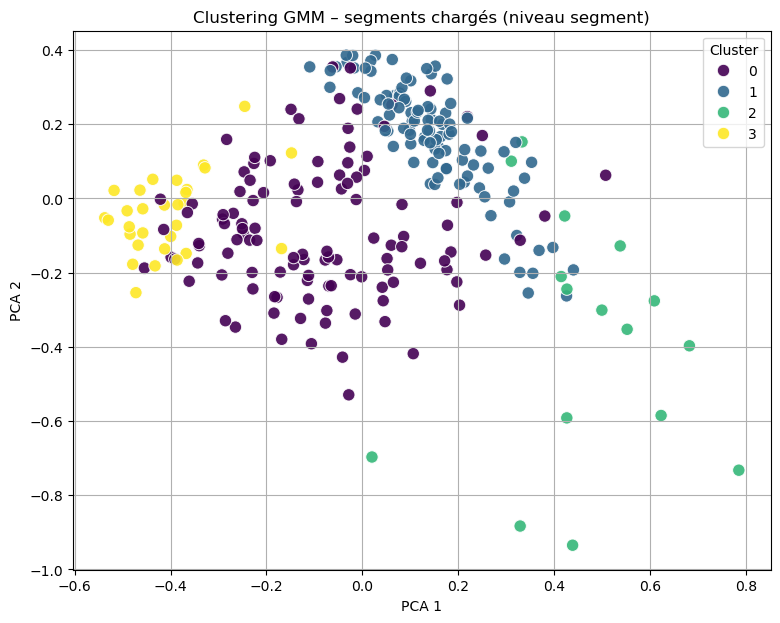


Cluster summary (mean damage score):
cluster
0    0.523780
1    0.604752
2    0.402284
3    0.581558
Name: damage_score, dtype: float64

Most destructive cluster: 1


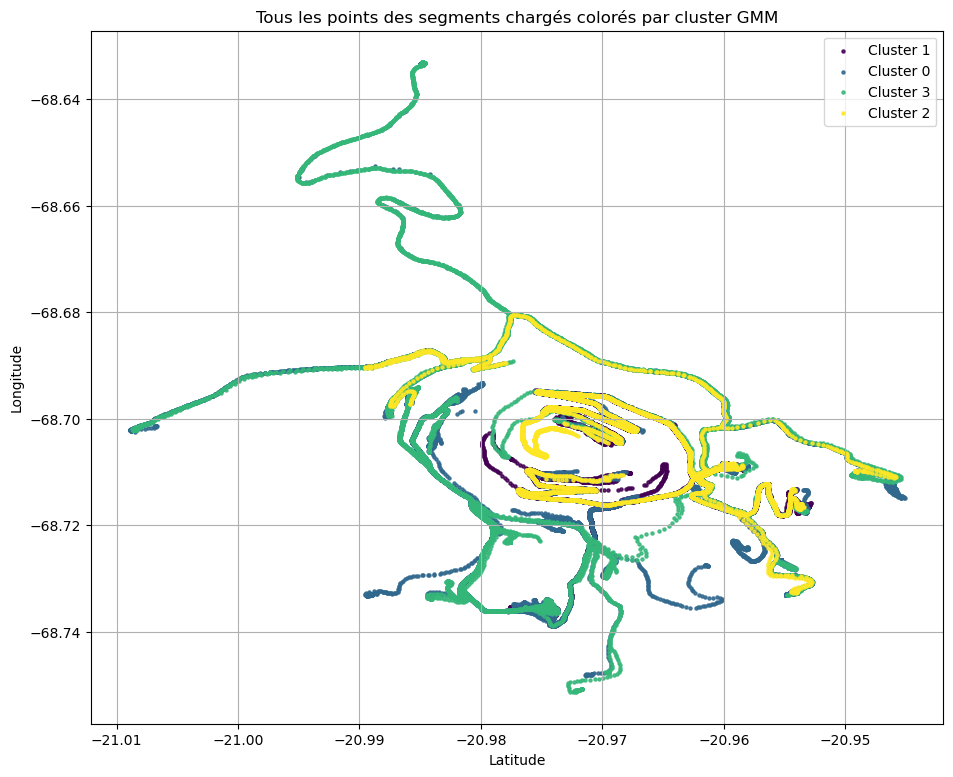

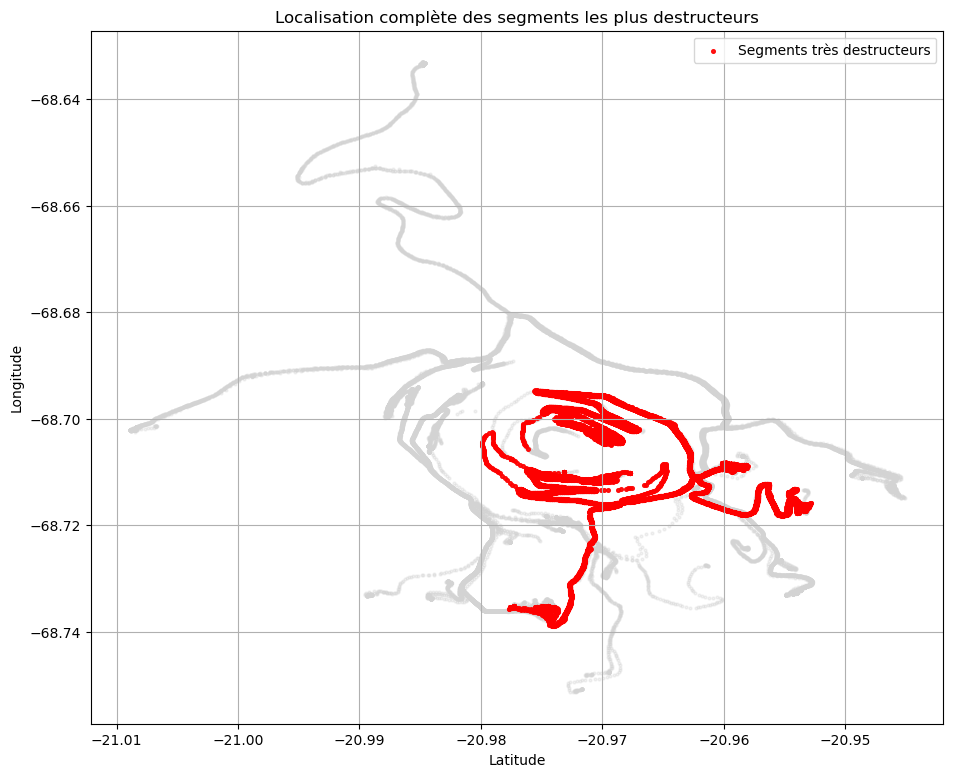

In [69]:
# =====================================================
# 4. Helper function
# =====================================================
def normalize(x):
    return (x - x.min()) / (x.max() - x.min() + 1e-9)

# =====================================================
# 5. Compute damage score per loaded segment
# =====================================================
segment_scores = []

for segment_id, segment in enumerate(load_segment_list):

    # Assign segment_id to ALL points
    segment['segment_id'] = segment_id

    # ---- Pressure ----
    pressure_cols = [f'Pressure_Pa_{i}' for i in range(1, 7)]
    cold_pressure_cols = [f'ColdPressure_Pa_{i}' for i in range(1, 7)]

    mean_pressure = segment[pressure_cols].mean(axis=1).mean()
    mean_cold_pressure = segment[cold_pressure_cols].mean(axis=1).mean()
    delta_pressure = abs(mean_pressure - mean_cold_pressure)

    # ---- Temperature ----
    temp_cols = [f'Temperature_K_{i}' for i in range(1, 7)]
    mean_temp = segment[temp_cols].mean(axis=1).mean()

    # ---- Vibrations / dynamics ----
    vibration_index = np.sqrt(
        segment['epsilonX']**2 +
        segment['epsilonY']**2 +
        segment['epsilonZ']**2
    ).mean()

    # ---- Speed & load ----
    mean_speed = segment['Speed_mps'].mean()
    speed_stress = mean_speed * segment['RatioPayload'].mean()

    # ---- Distance under constraint ----
    total_distance = segment['dd_m'].sum()

    # ---- Denivele signé ----
    total_denivele = segment['dAlt_m'].sum()  # positif = montée, négatif = descente
    
    segment_scores.append({
        'segment_id': segment_id,
        'mean_temp': mean_temp,
        'delta_pressure': delta_pressure,
        'vibration_index': vibration_index,
        'speed_stress': speed_stress,
        'distance_m': total_distance,
        'denivele_m': total_denivele
    })

# =====================================================
# 6. Create segment-level DataFrame
# =====================================================
score_df = pd.DataFrame(segment_scores)

# =====================================================
# 7. Normalize features
# =====================================================
features = [
    'mean_temp',
    'delta_pressure',
    'vibration_index',
    'speed_stress',
    'distance_m',
    'denivele_m'  
]

for col in features:
    score_df[col + '_norm'] = normalize(score_df[col])

# =====================================================
# 8. Final damage score
# =====================================================
score_df['damage_score'] = (
    0.20 * score_df['mean_temp_norm'] +
    0.22 * score_df['delta_pressure_norm'] +
    0.20 * score_df['vibration_index_norm'] +
    0.11 * score_df['speed_stress_norm'] +
    0.10 * score_df['distance_m_norm'] +
    0.17 * score_df['denivele_m_norm'] 
)

# =====================================================
# 9. Clustering with Gaussian Mixture Model
# =====================================================
X = score_df[
    [
        'mean_temp_norm',
        'delta_pressure_norm',
        'vibration_index_norm',
        'speed_stress_norm',
        'distance_m_norm',
        'denivele_m_norm'
    ]
].values

n_components = 4

gmm = GaussianMixture(
    n_components=n_components,
    covariance_type='full',
    random_state=42
)

score_df['cluster'] = gmm.fit_predict(X)
score_df['cluster_confidence'] = gmm.predict_proba(X).max(axis=1)

# =====================================================
# 10. PCA visualization (segment-level)
# =====================================================
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

score_df['pca_1'] = X_pca[:, 0]
score_df['pca_2'] = X_pca[:, 1]

plt.figure(figsize=(9, 7))
sns.scatterplot(
    x='pca_1',
    y='pca_2',
    hue='cluster',          # discrete coloring
    palette='viridis',
    data=score_df,
    s=80,
    alpha=0.9
)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Clustering GMM – segments chargés (niveau segment)")
plt.grid(True)
plt.legend(title='Cluster')
plt.show()

# =====================================================
# 11. Identify most destructive cluster
# =====================================================
cluster_summary = score_df.groupby('cluster')['damage_score'].mean()
worst_cluster = cluster_summary.idxmax()

print("\nCluster summary (mean damage score):")
print(cluster_summary)
print(f"\nMost destructive cluster: {worst_cluster}")

# =====================================================
# 12. Rebuild POINT-LEVEL DataFrame with clusters
# =====================================================
points_df = pd.concat(load_segment_list, ignore_index=True)

points_df = points_df.merge(
    score_df[['segment_id', 'cluster']],
    on='segment_id',
    how='left'
)

# =====================================================
# 13. Map ALL points colored by segment cluster (discrete)
# =====================================================
clusters = points_df['cluster'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(clusters)))

plt.figure(figsize=(11, 9))

for cluster, color in zip(clusters, colors):
    subset = points_df[points_df['cluster'] == cluster]
    plt.scatter(
        subset['Latitude_dd'],
        subset['Longitude_dd'],
        c=[color],
        s=5,
        alpha=0.85,
        label=f'Cluster {cluster}'
    )

plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Tous les points des segments chargés colorés par cluster GMM")
plt.legend()
plt.grid(True)
plt.show()

# =====================================================
# 14. Highlight most destructive segments (points)
# =====================================================
plt.figure(figsize=(11, 9))

# Background (all other points)
plt.scatter(
    points_df['Latitude_dd'],
    points_df['Longitude_dd'],
    c='lightgray',
    s=4,
    alpha=0.3
)

# Points du cluster le plus destructeur
worst_points = points_df[points_df['cluster'] == worst_cluster]

plt.scatter(
    worst_points['Latitude_dd'],
    worst_points['Longitude_dd'],
    c='red',
    s=7,
    alpha=0.9,
    label='Segments très destructeurs'
)

plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Localisation complète des segments les plus destructeurs")
plt.legend()
plt.grid(True)
plt.show()